In [1]:
from Bio import SeqIO
import sklearn.metrics as skmetrics
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import pandas as pd
import numpy as np
import numpy as np
from decimal import Decimal


class FishGenes(object):
    def __init__(self, fish_id=None, fish_type=None, sequence=None,
                 fishes={'fishname': [], 'number': [], 'replace': []}):
        self.fish_id = fish_id
        self.fish_type = fish_type
        self.sequence = sequence
        self.fishes = {'fishname': [], 'number': [], 'replace': []}


def parse_fasta(reffilename, fish_type):
    Fish_List = []
    for rec in SeqIO.parse(reffilename, "fasta"):
        name, sequence = rec.id, str(rec.seq)
        Fish_List.append(FishGenes(fish_id=name, fish_type=fish_type, sequence=sequence, fishes={}))
    return Fish_List


def convert_files(reffilename, reffilename2):
    Fish_DeepWater = []
    Fish_ShalloWater = []

    Fish_DeepWater = parse_fasta(reffilename, fish_type='deepwater')
    Fish_ShalloWater = parse_fasta(reffilename2, fish_type='shallowater')
    return Fish_DeepWater, Fish_ShalloWater


def get_dictionary(Fish_DeepWater):
    final_dictionary = []
    min_length = len(Fish_DeepWater[1].sequence)
    for k in range(len(Fish_DeepWater)):
        if len(Fish_DeepWater[k].sequence) < min_length:
            min_length = len(Fish_DeepWater[k].sequence)

    for j in range(min_length):
        fish_frequency_dictionary = {}
        for i in range(len(Fish_DeepWater)):
            if Fish_DeepWater[i].sequence[j] not in fish_frequency_dictionary:
                key = Fish_DeepWater[i].sequence[j]
                fish_frequency_dictionary[key] = 1 / len(Fish_DeepWater)
            else:
                key = Fish_DeepWater[i].sequence[j]
                fish_frequency_dictionary[key] += 1 / len(Fish_DeepWater)
        final_dictionary.append(fish_frequency_dictionary)
    return final_dictionary


def get_frequency(dict_deep, dict_shallow, sequence):
    final_sequence = []
    for i in range(len(dict_shallow)):
        final_dictionary = {}
        for j in range(len(sequence)):
            key = sequence[j]
            if key not in dict_deep[i]:
                dict_deep[i][key] = 0
            if key not in dict_shallow[i]:
                dict_shallow[i][key] = 0

            final_dictionary[key] = ("{0:.4f}".format(abs(dict_deep[i][key] ** 2 - dict_shallow[i][key] ** 2))).rstrip(
                '0').rstrip('.')
        final_sequence.append(final_dictionary)
    return final_sequence


In [2]:
aminofile1 = '/Users/alena_paliakova/Google Drive/!Bioinf_drive/00_FishPr/02_Fishgenes_work/data/deep_water_al_truncated_aminoacids.fasta'
aminofile2 = '/Users/alena_paliakova/Google Drive/!Bioinf_drive/00_FishPr/02_Fishgenes_work/data/shallowwater_al_aminoacids.fasta'

df_combine = pd.DataFrame()
Fish_DeepWater_amino, Fish_ShalloWater_amino = convert_files(aminofile1, aminofile2)

amino_Fish_DeepWater = get_dictionary(Fish_DeepWater_amino)
amino_Fish_ShalloWater = get_dictionary(Fish_ShalloWater_amino)


sequence = 'ARNDBCEQZGHILKMFPSTWYV'
frequency = get_frequency(amino_Fish_DeepWater, amino_Fish_ShalloWater, sequence)
df = pd.DataFrame.from_dict(frequency)

df.to_csv('/Users/alena_paliakova/Google Drive/!Bioinf_drive/00_FishPr/02_Fishgenes_work/F_amino_frequency.csv',
          index=False)

Alpha> 0.3
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23957358>


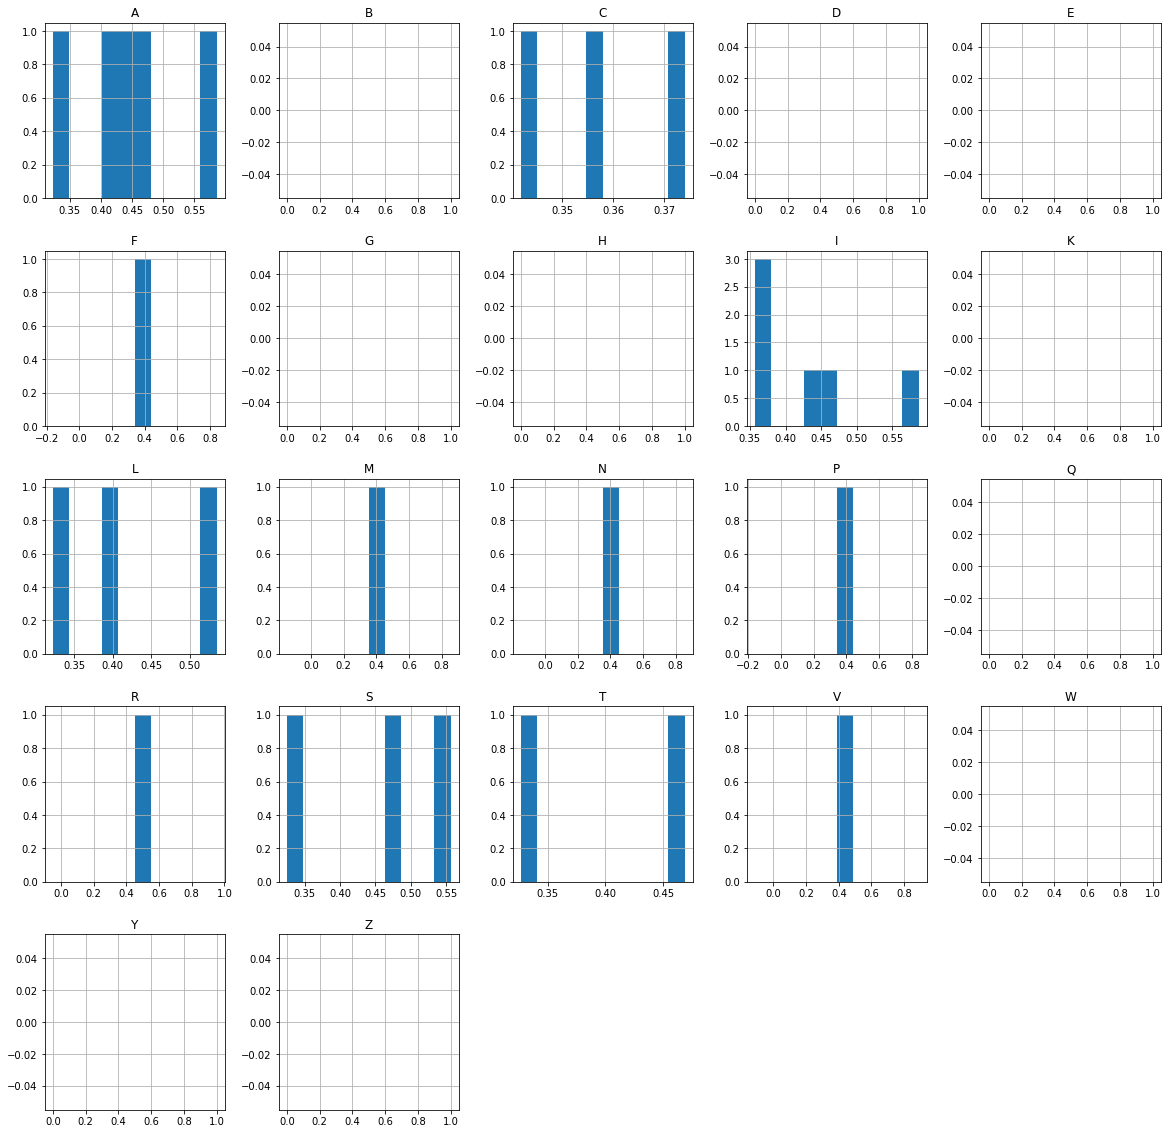

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_amino = pd.read_csv('/Users/alena_paliakova/Google Drive/!Bioinf_drive/00_FishPr/FishGenes_git/result/F_amino_frequency.csv')

k=0.3
print('Alpha>',k)
print(df_amino[df_amino> k].hist(figsize=(20,20)))